### Урок 1. Введение в PyTorch

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch import nn 
from torch import optim
from torch.autograd import Variable

from sklearn.metrics import accuracy_score

%matplotlib inline

1). Добиться вразумительного результата от модели, собранной на занятии (3 угаданные картинки из 4 предложенных на семинаре). Варианты изменений:
 - изменение слоёв и их количества;
 - изменение метода оптимизации; 
 - изменение процесса обучения; 
 - для продвинутых: преобразование данных.


In [4]:
train_dataset = torchvision.datasets.CIFAR10(
    root='E:/GB/PyTorch',
    train=True,
    transform=transforms.ToTensor(),
    download=True
)

train_loader = torch.utils.data.DataLoader(
    dataset=train_dataset,
    batch_size=40, 
    shuffle=True
)

Extracting E:/GB/PyTorch\cifar-10-python.tar.gz to E:/GB/PyTorch


In [5]:
test_dataset = torchvision.datasets.CIFAR10(
    root='E:\GB\PyTorch',
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=4,
    shuffle=False
)

Files already downloaded and verified


In [6]:
classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

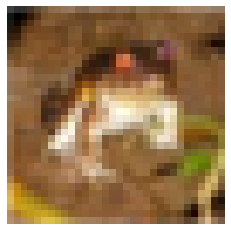


torch.Size([3, 32, 32])
6


In [7]:
image, label = train_dataset[0]
plt.imshow(image.permute(1, 2, 0).numpy())
plt.axis('off')
plt.show()

print (image.size())
print (label)

In [8]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 5, padding=1)
        self.conv2 = nn.Conv2d(32, 32, 5, padding=1)
        self.pool1 = nn.MaxPool2d(2, 2)
        self.conv3 = nn.Conv2d(32, 64, 5, padding=1)
        self.conv4 = nn.Conv2d(64, 64, 5, padding=1)
        self.pool2 = nn.MaxPool2d((2, 2), stride=1)
        self.fc1 = nn.Linear(64 * 9 * 9, 256)
        self.fc2 = nn.Linear(256, 256)
        self.fc3 = nn.Linear(256, 10)
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(F.relu(self.conv2(x)))
        x = self.dropout(x)
        x = F.relu(self.conv3(x))
        x = self.pool2(F.relu(self.conv4(x)))        
        x = self.dropout(x)
        x = x.view(-1, 64 * 9 * 9)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x


net = Net().to('cpu')

In [9]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

In [10]:
%%time
for epoch in range(20):  
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data[0], data[1]

        optimizer.zero_grad()

        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 300 == 0:    
            _, predicted = torch.max(outputs, 1)
            accuracy = accuracy_score(labels, predicted)
            print('[%2d, %5d] loss: %.6f accuracy: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000, accuracy))
            running_loss = 0.0

print('Training is finished!')

[ 1,     1] loss: 0.001151 accuracy: 0.075
[ 1,   301] loss: 0.314871 accuracy: 0.350
[ 1,   601] loss: 0.275520 accuracy: 0.425
[ 1,   901] loss: 0.250645 accuracy: 0.325
[ 1,  1201] loss: 0.235446 accuracy: 0.475
[ 2,     1] loss: 0.000876 accuracy: 0.350
[ 2,   301] loss: 0.221883 accuracy: 0.550
[ 2,   601] loss: 0.214968 accuracy: 0.700
[ 2,   901] loss: 0.207232 accuracy: 0.500
[ 2,  1201] loss: 0.205049 accuracy: 0.350
[ 3,     1] loss: 0.000575 accuracy: 0.575
[ 3,   301] loss: 0.196659 accuracy: 0.625
[ 3,   601] loss: 0.191392 accuracy: 0.550
[ 3,   901] loss: 0.191611 accuracy: 0.425
[ 3,  1201] loss: 0.183465 accuracy: 0.600
[ 4,     1] loss: 0.000689 accuracy: 0.550
[ 4,   301] loss: 0.177019 accuracy: 0.625
[ 4,   601] loss: 0.175962 accuracy: 0.600
[ 4,   901] loss: 0.173315 accuracy: 0.575
[ 4,  1201] loss: 0.171487 accuracy: 0.575
[ 5,     1] loss: 0.000508 accuracy: 0.575
[ 5,   301] loss: 0.163439 accuracy: 0.750
[ 5,   601] loss: 0.162616 accuracy: 0.675
[ 5,   901]

In [11]:
data_iter = iter(test_loader)
images, labels = data_iter.next()

outputs = net(images)
imgs = torchvision.utils.make_grid(images)

GroundTruth:    cat  ship  ship plane
Predicted:    horse  ship plane plane


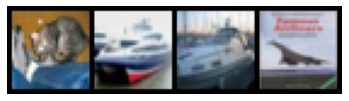

In [12]:
plt.imshow(imgs.permute(1, 2, 0).numpy())
plt.axis('off')

print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

_, predicted = torch.max(outputs, 1)
print('Predicted:   ', ' '.join('%5s' % classes[predicted[j]] for j in range(4)))

2). Взять часть, где мы делали один шаг обучения, и обернуть его в цикл по схеме, как обучали модель в конце занятия.

In [13]:
def print_tens_info(tensor):
    print("X :\n%s\n" % tensor)
    print("X количество измерений:\n%s\n" % tensor.dim())
    print("X размеры : ",  tensor.size())
    print("X тип : %s\n" % (tensor.type()))
r.mean(axis=0)))    

In [14]:
x = Variable(torch.randn(2), requires_grad = True)
y = Variable(torch.randn(2), requires_grad = False)

In [15]:
print_tens_info(x)

X :
tensor([-0.7286,  0.4440], requires_grad=True)

X количество измерений:
1

X размеры :  torch.Size([2])
X тип : torch.FloatTensor



In [16]:
linear = nn.Linear(2, 2)

In [17]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(linear.parameters(), lr=0.01)

In [18]:
for i in range(1000):  
    optimizer.zero_grad()

    pred = linear(x)
    loss = criterion(pred, y)
    loss.backward()
    optimizer.step()

    if i % 20 == 0:
        print('[%3d] loss: %.6f' %
                  (i, loss.item()))        

    if loss.item() <= 1e-6:
        break

[  0] loss: 0.315268
[ 20] loss: 0.156989
[ 40] loss: 0.078174
[ 60] loss: 0.038927
[ 80] loss: 0.019384
[100] loss: 0.009652
[120] loss: 0.004806
[140] loss: 0.002393
[160] loss: 0.001192
[180] loss: 0.000593
[200] loss: 0.000296
[220] loss: 0.000147
[240] loss: 0.000073
[260] loss: 0.000036
[280] loss: 0.000018
[300] loss: 0.000009
[320] loss: 0.000005
[340] loss: 0.000002
[360] loss: 0.000001


In [19]:
print('y:    ', y)
print('pred: ', pred)

y:     tensor([-0.6162,  0.0729])
pred:  tensor([-0.6152,  0.0720], grad_fn=<AddBackward0>)


3). Переписать эту программу на PyTorch

![img.png](img.png)
<br>Не забудьте про реализацию функции forward! 

In [20]:
class Net3(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 128)
        self.dropout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = x.view(-1, 28*28)
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.log_softmax(self.fc2(x), dim=-1)
        # x = self.fc2(x)
        return x


net3 = Net3().to('cpu')

In [21]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(net3.parameters())

In [22]:
x3 = Variable(torch.randn((28, 28)), requires_grad = True)
x3.size()

torch.Size([28, 28])

In [23]:
y3 = np.zeros(10)
y3[3] = 1.

y3 = Variable(torch.tensor(y3.reshape(1, 10)), requires_grad = False)
y3.size()

torch.Size([1, 10])

In [24]:
pred3 = net3(x3)
pred3.size()

torch.Size([1, 10])